In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

data_path = "../data/"
csv_path = "\\Users\\User\\iCloudDrive\\"
box_path = "\\Users\\User\\Dropbox\\"
one_path = "\\Users\\User\\OneDrive\\Documents\\Data\\"
osd_path = "\\Users\\User\\OneDrive\\Documents\\obsidian-git-sync\\Data\\"

pd.options.display.max_rows = 38
float_formatter = "฿{:,.2f}"

engine = create_engine("mysql+pymysql://root:@localhost:3306/stock")
const = engine.connect()

<IPython.core.display.Javascript object>

In [2]:
bom = date(2023, 7, 1)
eom = bom.replace(day=calendar.monthrange(bom.year, bom.month)[1])
bom, eom

(datetime.date(2023, 7, 1), datetime.date(2023, 7, 31))

In [3]:
#eom = date(2023, 4, 28)

In [4]:
sql = """
SELECT B.name, B.date, volbuy, volbuy * B.price AS cost_amount, 
volbuy * P.price AS market_value, period 
FROM buy B 
JOIN price P USING (name) 
WHERE active=1 AND P.date = "%s" 
ORDER BY period, B.name"""
sql = sql % eom
print(sql)

pd.options.display.max_rows = 30
df = pd.read_sql(sql, const, parse_dates=["date"], index_col="name")
df


SELECT B.name, B.date, volbuy, volbuy * B.price AS cost_amount, 
volbuy * P.price AS market_value, period 
FROM buy B 
JOIN price P USING (name) 
WHERE active=1 AND P.date = "2023-07-31" 
ORDER BY period, B.name


,date,volbuy,cost_amount,market_value,period
name,,,,,


In [5]:
df_out = df

In [6]:
file_name = "stock-by-period.csv"
data_file = data_path + file_name
output_file = csv_path + file_name
box_file = box_path + file_name
one_file = one_path + file_name
osd_file = osd_path + file_name

df_out.sort_values(by=['period','name'],ascending=[True,True]).to_csv(output_file)
df_out.sort_values(by=['period','name'],ascending=[True,True]).to_csv(data_file)
df_out.sort_values(by=['period','name'],ascending=[True,True]).to_csv(box_file)
df_out.sort_values(by=['period','name'],ascending=[True,True]).to_csv(one_file)
df_out.sort_values(by=['period','name'],ascending=[True,True]).to_csv(osd_file)

In [7]:
df.period.replace(
    ["1", "2", "3", "4"],
    ["disposal", "high dividend", "long term", "short term"],
    inplace=True
)
grouped = df.groupby(by="period")
grouped[["cost_amount", "market_value"]].sum()

,cost_amount,market_value
period,,


In [8]:
cost_summary = grouped.sum().cost_amount
cost_summary

,cost_amount
period,


In [9]:
type(cost_summary)

pandas.core.series.Series

In [10]:
# Define a formatting function that converts a float to a string with two decimal places
def to_currency(x):
    return '{:,.2f}'.format(x)

# Apply the formatting function to the float column
cost_format = cost_summary.apply(to_currency)

print(cost_format)


period
disposal         2,403,900.00
high dividend    5,581,800.00
long term        1,496,100.00
short term       2,116,830.00
Name: cost_amount, dtype: object


In [23]:
#cost_amt = f'{sum(cost_summary):,.2f}'
cost_amt = grouped[["cost_amount"]].sum()
print(cost_amt.sum())

cost_amount    11598630.0
dtype: float64


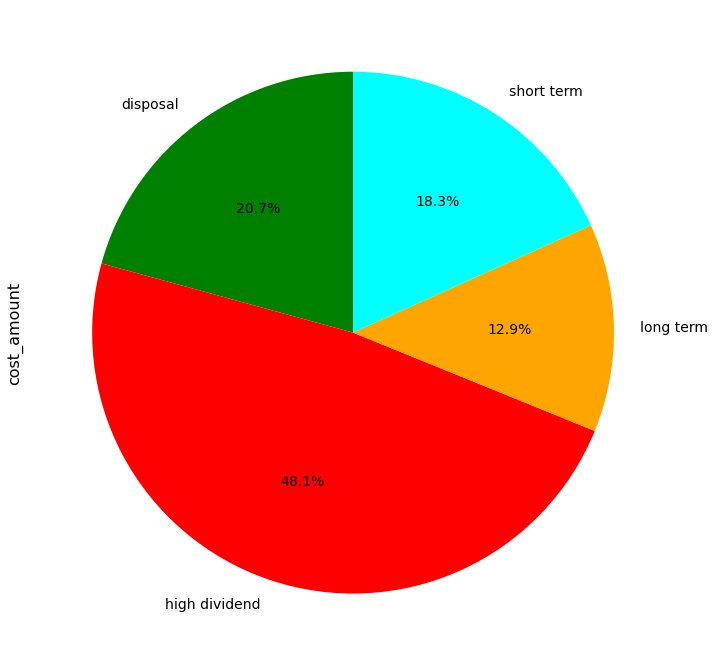

In [12]:
fig_path = "../fig/Portfolio-at-Cost-2307.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = cost_summary.plot.pie(
        colors=["green", "red", "orange", "cyan"], startangle=90, autopct="%1.1f%%"
    )
    plt.savefig(fig_path)

In [13]:
market_summary = grouped.sum().market_value
market_summary

,market_value
period,


In [15]:
formatted_amt = '{:,.2f}'.format(sum(market_summary))
print(formatted_amt)

7,694,650.00


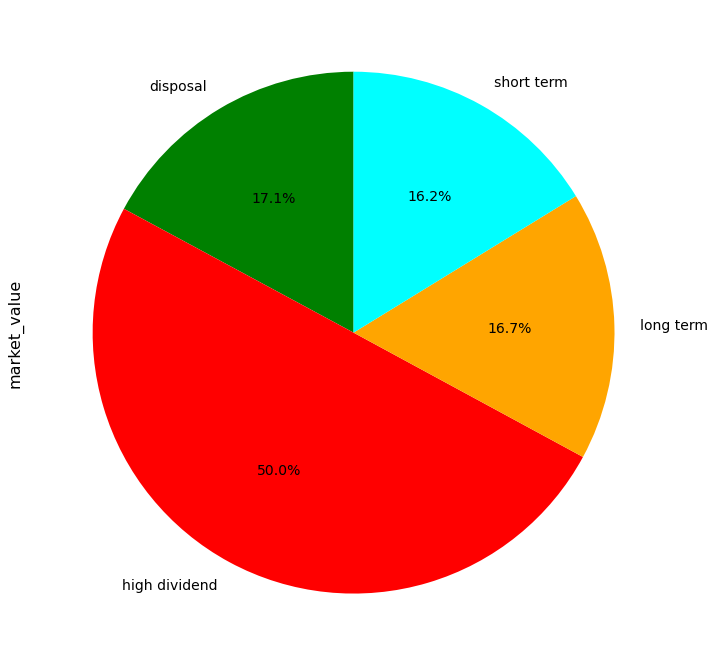

In [24]:
fig_path = "../fig/Portfolio-at-Market-2307.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = market_summary.plot.pie(
        colors=["green", "red", "orange", "cyan"], startangle=90, autopct="%1.1f%%"
    )
    plt.savefig(fig_path)